In [12]:
import pandas as pd
import re
import textCleaning as tc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
df = pd.read_csv("data/tiktok_comments_with_sentiment.csv")
df

,text,createTime,sentiment_score,sentiment_label
0,gibran:,1764933105,-0.000918,neutral
1,ini emg harusnya ganti rakyat sih. bgnian emg ...,1764928295,0.126971,positive
2,wapres aja gak pakek rompi anti peluru,1764922201,0.002260,neutral
3,di indo doang presiden n wapres di hujat wkwk,1764925978,-0.000605,neutral
4,"di X parah bett anjir komenannya, merinding la...",1764922173,0.098610,positive
...,...,...,...,...
4150,Dikasih yg muda biar satset dihujat😭😭,1764934100,-0.100156,negative
4151,Bahlil dan menteri kehutanan belike: Gibran sa...,1765114598,0.006021,neutral
4152,"ini bagus tidak ada salahnya, semoga seterusny...",1765363698,0.124481,positive
4153,wapresnya cakep muda lagi 😂,1765359822,0.028533,neutral


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             4155 non-null   object 
 1   createTime       4155 non-null   int64  
 2   sentiment_score  4155 non-null   float64
 3   sentiment_label  4155 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 130.0+ KB


In [14]:
df.dropna(inplace=True, subset=['text', 'createTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             4155 non-null   object 
 1   createTime       4155 non-null   int64  
 2   sentiment_score  4155 non-null   float64
 3   sentiment_label  4155 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 130.0+ KB


#### WordCloud

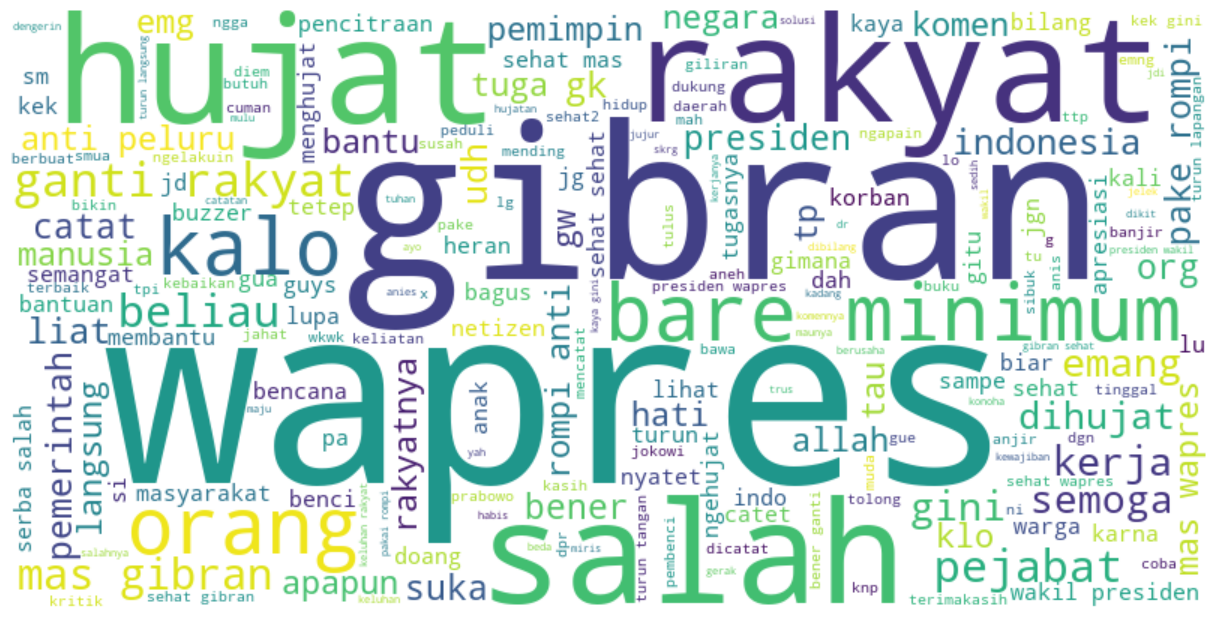

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def clean_text_for_indobert(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

cleanedTxt = df['text'].apply(clean_text_for_indobert)
wordcloudtxt = cleanedTxt.apply(tc.tokenizingText).apply(tc.filteringText)
    
# Convert list of tokens back to string
wordcloud_text = ' '.join(wordcloudtxt.apply(lambda x: ' '.join(x)))

# Create wordcloud from cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Display wordcloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

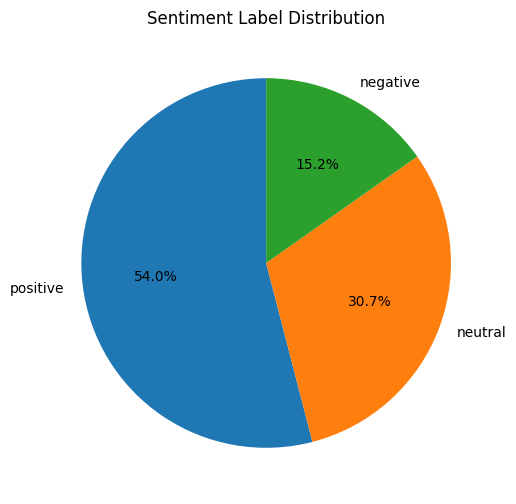

In [16]:
# Count sentiment labels
sentiment_counts = df['sentiment_label'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Label Distribution")
plt.show()

In [17]:
x = pd.to_datetime(df['createTime'], unit='s')

df_regression = pd.DataFrame()
start_time = x.min()

df_regression['x'] = (x - start_time).dt.total_seconds() / 3600
df_regression['y'] = df['sentiment_score']


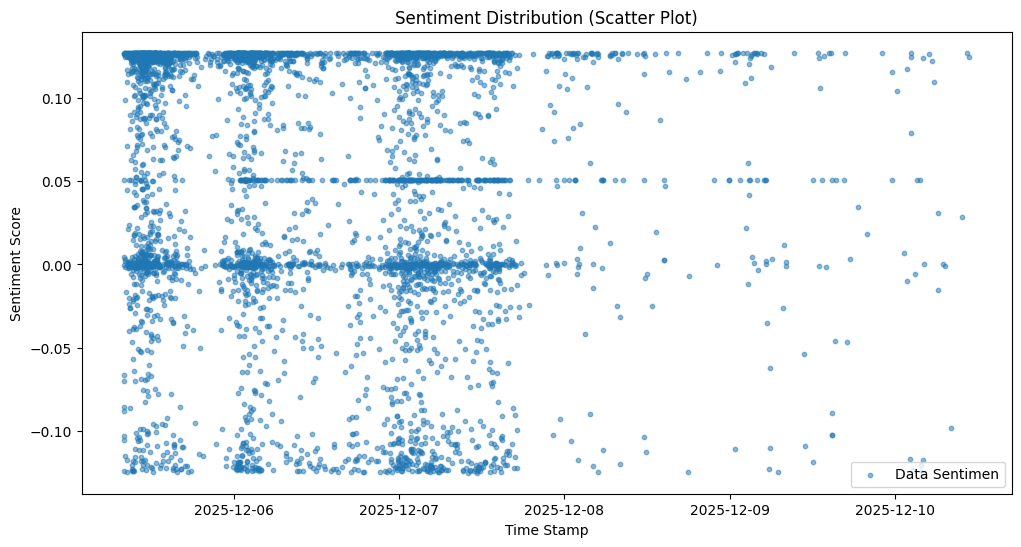

In [18]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x, df['sentiment_score'], alpha=0.5, s=10, label='Data Sentimen')
plt.title("Sentiment Distribution (Scatter Plot)")
plt.xlabel("Time Stamp" )
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()

MSE Model Linear (Kaku): 0.006514514239804611


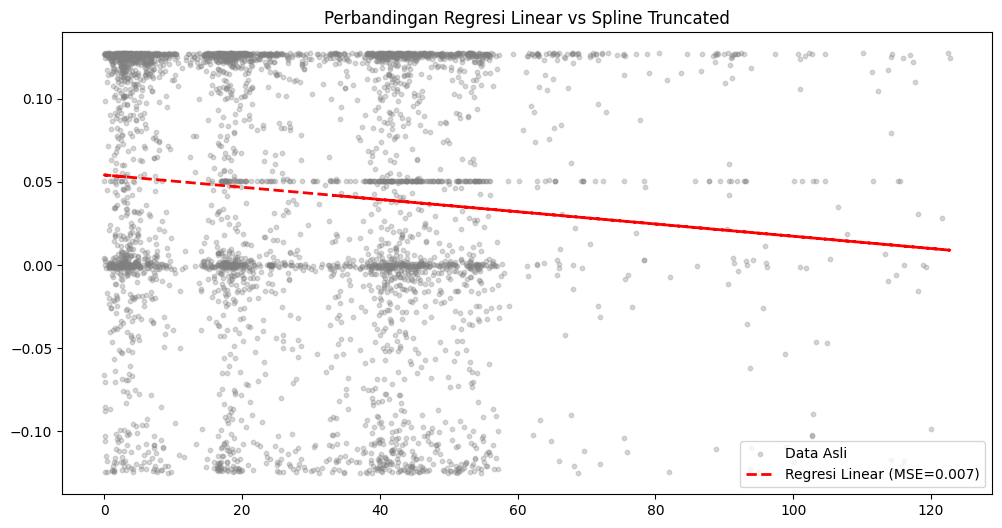

In [19]:


x = df_regression['x'].values
y = df_regression['y'].values
coeffs_linear = np.polyfit(x, y, 1) 
y_linear = np.polyval(coeffs_linear, x)

mse_linear = mean_squared_error(y, y_linear)


print(f"MSE Model Linear (Kaku): {mse_linear}")

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='gray', alpha=0.3, s=10, label='Data Asli')
plt.plot(x, y_linear, color='red', linestyle='--', linewidth=2, label=f'Regresi Linear (MSE={mse_linear:.3f})')
plt.legend()
plt.title("Perbandingan Regresi Linear vs Spline Truncated")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12068\690754194.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('6H')['sentiment_score']


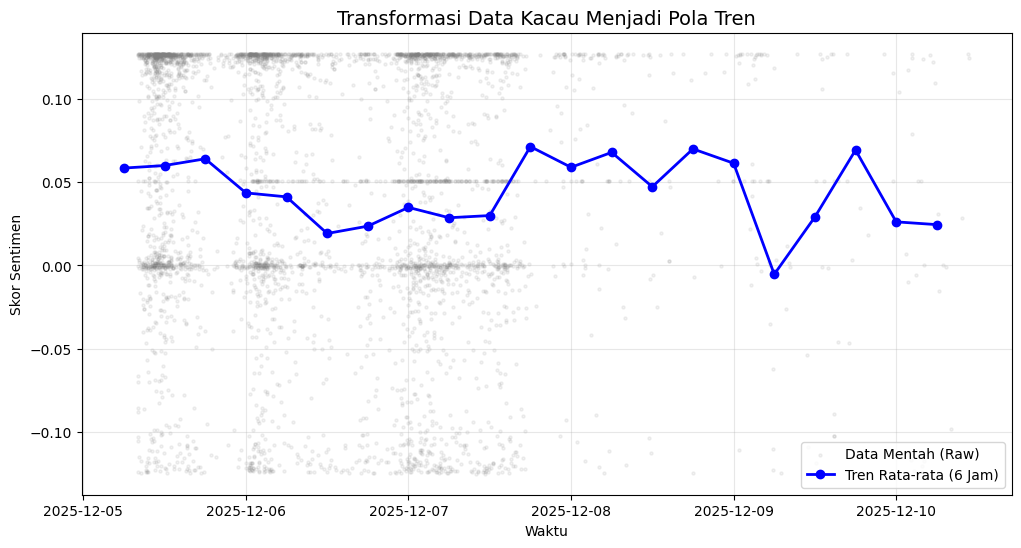

In [20]:
# 1. Gunakan df yang sudah ada dari sel sebelumnya

# 2. Convert Kolom Waktu (createTime) ke Format DateTime
# Asumsi createTime adalah timestamp UNIX. Kalau bukan, sesuaikan.
df['datetime'] = pd.to_datetime(df['createTime'], unit='s')

# 3. Lakukan RESAMPLING (Pengelompokan) hanya pada kolom numerik yang relevan
# Kita hitung rata-rata sentimen setiap 6 jam ('6H')
df_resampled = (
	df.set_index('datetime')
	  .resample('6H')['sentiment_score']
	  .mean()
	  .reset_index()
)

# Hapus data kosong (misal jam 3 pagi gak ada yg komen)
df_resampled = df_resampled.dropna(subset=['sentiment_score'])

# 4. Visualisasi Data yang Sudah "Dihaluskan"
plt.figure(figsize=(12, 6))

# Plot Data Asli (Titik Kecil Transparan) - Biar dosen tau aslinya kacau
plt.scatter(df['datetime'], df['sentiment_score'], alpha=0.1, color='gray', s=5, label='Data Mentah (Raw)')

# Plot Data Rata-rata (Garis Tegas) - Ini POLA yang dicari Spline nanti
plt.plot(df_resampled['datetime'], df_resampled['sentiment_score'], color='blue', linewidth=2, marker='o', label='Tren Rata-rata (6 Jam)')

plt.title('Transformasi Data Kacau Menjadi Pola Tren', fontsize=14)
plt.xlabel('Waktu')
plt.ylabel('Skor Sentimen')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Simpan data yang sudah rapi ini buat dihitung pakai Spline
df_resampled.to_csv("data_siap_spline_bersih.csv", index=False)

In [ ]:
# 1. Load Data Bersih Kamu
df = pd.read_csv("data_siap_spline_bersih.csv")

# Kita ubah datetime jadi angka urutan (0, 1, 2, 3...) biar bisa dihitung
# Ini disebut "Time Index"
df['time_idx'] = np.arange(len(df))

X = df[['time_idx']].values
y = df['sentiment_score'].values

# 2. Siapkan Wadah Pencatat Skor
best_mse = float('inf') # Set error awal ke Infinity (tak terbatas)
best_knot = None
best_model = None

# 3. LOOPING: Coba pasang Knot di setiap titik waktu (mulai indeks 5 sampai akhir - 5)
# Kita hindari ujung paling awal dan akhir biar gak error
potential_knots = df['time_idx'].values[5:-5]

print("Sedang mencari Knot terbaik...")

for k in potential_knots:
    # --- PROSES MATEMATIKA ---
    # a. Buat fitur Truncated (x - k)+
    X_truncated = np.maximum(0, X - k)
    
    # b. Gabung X dan Truncated
    X_combined = np.hstack([X, X_truncated])
    
    # c. Hitung Model (Cari Beta)
    model = LinearRegression()
    model.fit(X_combined, y)
    y_pred = model.predict(X_combined)
    
    # d. Hitung Error (MSE)
    mse = mean_squared_error(y, y_pred)
    
    # --- BANDINGKAN SKOR ---
    # Kalau error sekarang lebih kecil dari rekor sebelumnya, simpan!
    if mse < best_mse:
        best_mse = mse
        best_knot = k
        best_model = model

# 4. UMUMKAN PEMENANG
# Kembalikan time_idx ke jam asli biar manusia paham
waktu_knot_asli = df.iloc[best_knot]['datetime']

print(f"\n=== KNOT OPTIMAL DITEMUKAN! ===")
print(f"Posisi Index Knot : {best_knot}")
print(f"Waktu Kejadian    : {waktu_knot_asli}")
print(f"Minimum MSE       : {best_mse}")


Sedang mencari Knot terbaik...

=== KNOT OPTIMAL DITEMUKAN! ===
Posisi Index Knot : 5
Waktu Kejadian    : 2025-12-06 12:00:00
Minimum MSE       : 0.00038427155493164284

Silakan catat nilai 'Waktu Kejadian' dan 'MSE' ini untuk Bab 4 Skripsi!
